<a href="https://colab.research.google.com/github/pkky/Glebokie-uczenie/blob/main/Praca_domowa_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A regression example

Common type of machine learning problem is "regression", which consists of predicting a continuous value instead of a discrete label. For instance, predicting the temperature tomorrow, given meteorological data, or predicting the time that a software project will take to complete, given its specifications.

In [1]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers

import numpy as np
import matplotlib.pyplot as plt


1-dimensional data

In [2]:
def funct(x):
  return x*x*np.sin(x)+np.log(2*x)

size = 200
low=0
high=12
error=20

XX_train = np.random.uniform(low=low, high=high, size=size)
XX_test = np.random.uniform(low=low, high=high, size=size)
yy_train = funct(XX_train) + np.random.normal(0., error, size)
yy_test = funct(XX_test) + np.random.normal(0., error, size)

print(XX_train.shape, yy_train.shape)

(200,) (200,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<function matplotlib.pyplot.show>

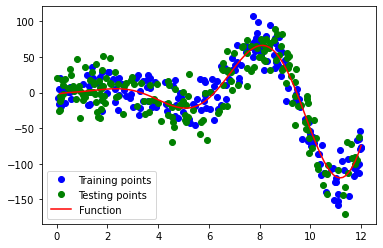

In [3]:
plt.plot(XX_train,yy_train, 'o', color='blue', label='Training points')
plt.plot(XX_test,yy_test, 'o', color='green', label='Testing points')

points = np.linspace(low, high,num=100)
plt.plot(points, funct(points),  color='red', label='Function')
plt.legend()


plt.show

Preparing the data

It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a unit standard deviation. This is easily done in Numpy:

In [5]:
# Tutaj należy znormalizować dane, i.e. 
# - odjąć średnią
# - podzielić przez odchylenie standardowe

# 
mean = XX_train.mean(axis=0)
XX_train_n = XX_train-mean
std = XX_train_n.std(axis=0)
XX_train_n /= std

# to samo dla x_test
XX_test_n = XX_test - mean
XX_test_n /= std

mean1 = yy_train.mean(axis=0)
yy_train_n = yy_train-mean1
std1 = yy_train_n.std(axis=0)
yy_train_n /= std1

# to samo dla y_test
yy_test_n = yy_test - mean1
yy_test_n /= std1

# A teraz to samo dla yy_train i yy_test
# dopisać to samo dla y


Define neural network

In [6]:
# Zbudować sieć neuronową, działa: dwie warstwy ukryte, aktywacja relu
from keras import models
from keras import layers

model0 = Sequential(name='network')
#.....
model0.add(layers.Dense(1024, activation='relu', input_shape=(1,)))
model0.add(Dropout(0.1))
model0.add(layers.Dense(1024, activation='relu'))
model0.add(Dropout(0.1))
model0.add(layers.Dense(1, activation='linear'))

model0.summary()

Model: "network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              2048      
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1025      
Total params: 1,052,673
Trainable params: 1,052,673
Non-trainable params: 0
_________________________________________________________________


Train neural network

For regression problems, mean squared error (MSE) is often employed

In [7]:
# compile and train NN
# Uwaga: dla regresji używamy: loss = 'mean_squared_error'   oraz metrics = ['mse']
opt=optimizers.RMSprop(lr=0.001)
model0.compile(optimizer=opt,
                       loss='mean_squared_error',
                       metrics=['mse'])
history = model0.fit(XX_train_n, yy_train_n,
                                     epochs=500,
                                     batch_size=128,
                                     validation_data=(XX_test_n, yy_test_n),
                                     verbose = 1)

Epoch 1/500
2/2 [==============================] - 1s 446ms/step - loss: 1.0582 - mse: 1.0582 - val_loss: 0.6829 - val_mse: 0.6829
Epoch 2/500
2/2 [==============================] - 0s 68ms/step - loss: 0.8075 - mse: 0.8075 - val_loss: 0.6485 - val_mse: 0.6485
Epoch 3/500
2/2 [==============================] - 0s 68ms/step - loss: 0.7040 - mse: 0.7040 - val_loss: 0.6163 - val_mse: 0.6163
Epoch 4/500
2/2 [==============================] - 0s 67ms/step - loss: 0.6975 - mse: 0.6975 - val_loss: 0.5841 - val_mse: 0.5841
Epoch 5/500
2/2 [==============================] - 0s 69ms/step - loss: 0.5982 - mse: 0.5982 - val_loss: 0.5385 - val_mse: 0.5385
Epoch 6/500
2/2 [==============================] - 0s 72ms/step - loss: 0.5698 - mse: 0.5698 - val_loss: 0.5095 - val_mse: 0.5095
Epoch 7/500
2/2 [==============================] - 0s 76ms/step - loss: 0.5073 - mse: 0.5073 - val_loss: 0.4522 - val_mse: 0.4522
Epoch 8/500
2/2 [==============================] - 0s 66ms/step - loss: 0.4411 - mse: 0.4


Plot loss

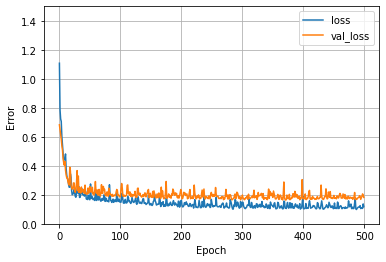

In [8]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error ')
  plt.legend()
  plt.grid(True)

plot_loss(history)

Evaluate neural network

In [9]:
results = model0.evaluate(XX_test_n, yy_test_n)

print('loss test data: ', results[0])
print('mse test data: ', results[1])

results = model0.evaluate(XX_train_n, yy_train_n)

print('loss train data: ', results[0])
print('mse train data: ', results[1])

7/7 [==============================] - 0s 4ms/step - loss: 0.1820 - mse: 0.1820
loss test data:  0.18196234107017517
mse test data:  0.18196234107017517
7/7 [==============================] - 0s 3ms/step - loss: 0.1054 - mse: 0.1054
loss train data:  0.10540910810232162
mse train data:  0.10540910810232162


Plot results

<function matplotlib.pyplot.show>

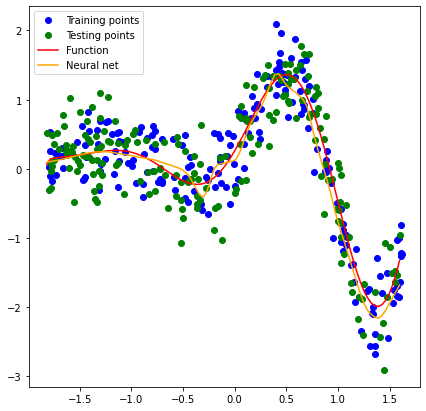

In [10]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train_n,yy_train_n, 'o', color='blue', label='Training points')
plt.plot(XX_test_n,yy_test_n, 'o', color='green', label='Testing points')

points = np.linspace(min(XX_test_n), max(XX_test_n),num=100)
plt.plot(points, (funct(points*std+mean)-mean1)/std1,  color='red', label='Function')

plt.plot(points, model0.predict(points),  color='orange', label='Neural net')


plt.legend()


plt.show

#Regularizer

In [11]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

In [12]:
def funct(x):
  return x*x*np.sin(x)+np.log(2*x)

size = 150
low=0
high=12
error=5

XX_train = np.random.uniform(low=low, high=high, size=size)
XX_test = np.random.uniform(low=low, high=high, size=size)
yy_train = funct(XX_train) + np.random.normal(0., error, size)
yy_test = funct(XX_test) + np.random.normal(0., error, size)

print(XX_train.shape, yy_train.shape)

(150,) (150,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<function matplotlib.pyplot.show>

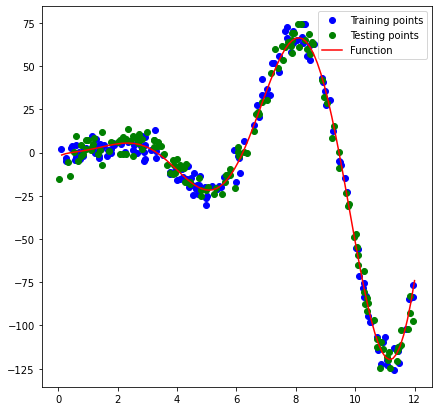

In [13]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train,yy_train, 'o', color='blue', label='Training points')
plt.plot(XX_test,yy_test, 'o', color='green', label='Testing points')

points = np.linspace(low, high,num=100)
plt.plot(points, funct(points),  color='red', label='Function')
plt.legend()


plt.show

In [14]:
# Tutaj należy znormalizować dane, i.e. 
# - odjąć średnią
# - podzielić przez odchylenie standardowe

# 
mean = XX_train.mean(axis=0)
XX_train_n = XX_train-mean
std = XX_train_n.std(axis=0)
XX_train_n /= std

# to samo dla x_test
XX_test_n = XX_test - mean
XX_test_n /= std

mean1 = yy_train.mean(axis=0)
yy_train_n = yy_train-mean1
std1 = yy_train_n.std(axis=0)
yy_train_n /= std1

# to samo dla y_test
yy_test_n = yy_test - mean1
yy_test_n /= std1

# A teraz to samo dla yy_train i yy_test
# dopisać to samo dla y

In [15]:
# Zbudować sieć neuronową, działa: dwie warstwy ukryte, aktywacja relu
from keras import models
from keras import layers
from keras import regularizers

model0 = Sequential(name='network')
#.....
model0.add(layers.Dense(1024,kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(1,)))
model0.add(layers.Dense(1024,kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model0.add(layers.Dense(1, activation='linear'))

model0.summary()

Model: "network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              2048      
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1025      
Total params: 1,052,673
Trainable params: 1,052,673
Non-trainable params: 0
_________________________________________________________________


In [16]:
# compile and train NN
# Uwaga: dla regresji używamy: loss = 'mean_squared_error'   oraz metrics = ['mse']
opt=optimizers.RMSprop(lr=0.002)
model0.compile(optimizer=opt,
                       loss='mean_squared_error',
                       metrics=['mse'])
history = model0.fit(XX_train_n, yy_train_n,
                                     epochs=600,
                                     batch_size=128,
                                     validation_data=(XX_test_n, yy_test_n),
                                     verbose = 1)

Epoch 1/600
2/2 [==============================] - 1s 185ms/step - loss: 2.1896 - mse: 1.1829 - val_loss: 1.9653 - val_mse: 1.2260
Epoch 2/600
2/2 [==============================] - 0s 66ms/step - loss: 1.7587 - mse: 1.0265 - val_loss: 1.3825 - val_mse: 0.7711
Epoch 3/600
2/2 [==============================] - 0s 64ms/step - loss: 1.3217 - mse: 0.7150 - val_loss: 1.2219 - val_mse: 0.6966
Epoch 4/600
2/2 [==============================] - 0s 63ms/step - loss: 1.2133 - mse: 0.6913 - val_loss: 1.1719 - val_mse: 0.7111
Epoch 5/600
2/2 [==============================] - 0s 62ms/step - loss: 1.1201 - mse: 0.6618 - val_loss: 1.0012 - val_mse: 0.5893
Epoch 6/600
2/2 [==============================] - 0s 68ms/step - loss: 0.9747 - mse: 0.5648 - val_loss: 1.1267 - val_mse: 0.7508
Epoch 7/600
2/2 [==============================] - 0s 60ms/step - loss: 1.1543 - mse: 0.7805 - val_loss: 0.8782 - val_mse: 0.5381
Epoch 8/600
2/2 [==============================] - 0s 64ms/step - loss: 0.8768 - mse: 0.5

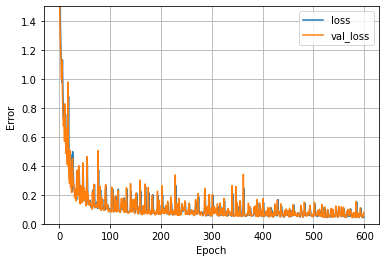

In [17]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error ')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [18]:
results = model0.evaluate(XX_test_n, yy_test_n)

print('loss test data: ', results[0])
print('mse test data: ', results[1])

results = model0.evaluate(XX_train_n, yy_train_n)

print('loss train data: ', results[0])
print('mse train data: ', results[1])

5/5 [==============================] - 0s 6ms/step - loss: 0.0789 - mse: 0.0616
loss test data:  0.0788796991109848
mse test data:  0.06164010241627693
5/5 [==============================] - 0s 5ms/step - loss: 0.0812 - mse: 0.0640
loss train data:  0.08122939616441727
mse train data:  0.0639898031949997


<function matplotlib.pyplot.show>

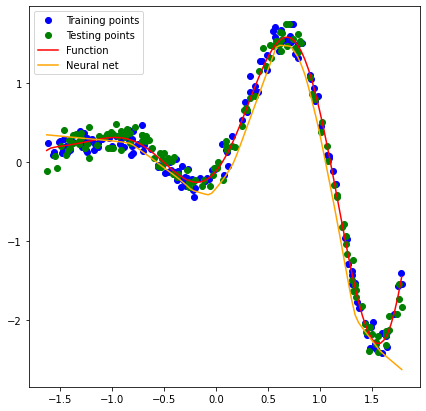

In [19]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train_n,yy_train_n, 'o', color='blue', label='Training points')
plt.plot(XX_test_n,yy_test_n, 'o', color='green', label='Testing points')

points = np.linspace(min(XX_test_n), max(XX_test_n),num=100)
plt.plot(points, (funct(points*std+mean)-mean1)/std1,  color='red', label='Function')

plt.plot(points, model0.predict(points),  color='orange', label='Neural net')

plt.legend()

plt.show

**The Boston Housing Price dataset**

We will be attempting to predict the median price of homes in a given Boston suburb in the mid-1970s, given a few data points about the suburb at the time, such as the crime rate, the local property tax rate, etc.

The dataset has very few data points, only 506 in total, split between 404 training samples and 102 test samples, and each "feature" in the input data (e.g. the crime rate is a feature) has a different scale. For instance some values are proportions, which take a values between 0 and 1, others take values between 1 and 12, others between 0 and 100...

In [20]:
from keras.datasets import boston_housing

(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


**Preparing the data**

It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult. A widespread best practice to deal with such data is to do feature-wise normalization: for each feature in the input data (a column in the input data matrix), we will subtract the mean of the feature and divide by the standard deviation, so that the feature will be centered around 0 and will have a unit standard deviation. This is easily done in Numpy:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


<function matplotlib.pyplot.show>

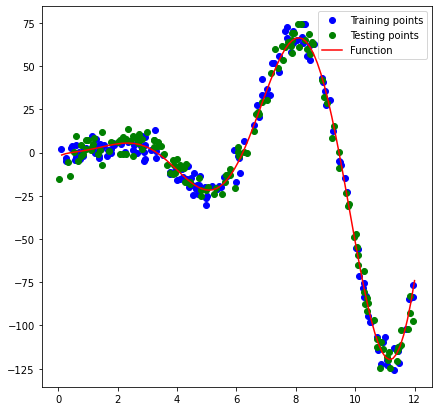

In [21]:
fig = plt.figure(figsize=(7,7))

plt.plot(XX_train,yy_train, 'o', color='blue', label='Training points')
plt.plot(XX_test,yy_test, 'o', color='green', label='Testing points')

points = np.linspace(low, high,num=100)
plt.plot(points, funct(points),  color='red', label='Function')
plt.legend()


plt.show

Define, compile and train neural network

In [22]:
model = Sequential()

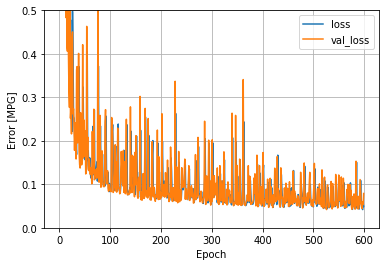

In [23]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.5])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)